
# Airbnb Pricing Assistant
Airbnb(Air Bed and Breakfast) is an American online marketing place for short-term and long-term homestays. It helps to connect homeowners with guests who are looking for accommodation. The company started in 2008, but it became popular in late 2014. In this project, we will work with the Broward County, Florida - Airbnb Listing dataset. Broward County is the second largest county in Florida, with a booming tourism industry. A lot of people opt for Airbnb when compared to traditional hotel stays. While price is essential for people selecting the place, other factors influence their decision, such as location, property cleanliness, check-in process, and amenities. 
 
The business problem the company often face is setting a fair price. The listing price should not be too low or high. The company Airbnb must suggest a better price to the guests. So they don't lose customers to competitors such as Vrbo, Expedia, and TripAdvisor. We will use a data mining solution to solve this problem. In this model-building project, we will predict the price that Airbnb can suggest to guests based on various features such as location, number of bedrooms and bathrooms, property type, and customer ratings. This model also can be used by homeowners to list their properties appropriately. The target for this model is the listing price. The historical dataset used for this model is https://www.kaggle.com/datasets/suveesh/broward-county-florida-united-states?select=BC+Florida+-+Listing.csv. The dataset contains  23 columns such as id, name, host_id, host_name, neighbourhood_group, neighborhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, review_scores_rating, review_scores_accuracy, review_scores_cleanliness,  review_scores_checkin, review_scores_communication, review_scores_location and review_scores_value, and around 10000 observations. We will conduct exploratory data analysis, cleaning, model building, and evaluation. The dataset available is from before the COVID-19 pandemic. The accuracy of the model can be improved when more observations are available. 

In [172]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import pearsonr

## Exploratory data analysis

In [173]:
#load the airbnb data into a dataframe
airbnb_fl_df = pd.read_csv('BC Florida - Listing.csv')

#display the first 5 rows of data
airbnb_fl_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,57818,Private house close to the beach!,275948,VonJon,NaN,Hollywood,26.01670,-80.12437,Entire home/apt,146,...,0.43,1,361,94.0,10.0,9.0,10.0,10.0,10.0,9.0
1,69824,2 bd/2ba Oceanfront Condo,351303,Tracy,NaN,Hallandale Beach,25.97840,-80.12028,Entire home/apt,100,...,0.20,2,0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
2,83449,MARY POP APTS 2/1 APT SLEEP 5,454736,"Jon, Mary Pop Apartments",NaN,Dania Beach,26.03392,-80.14201,Entire home/apt,99,...,0.18,8,314,95.0,10.0,10.0,10.0,10.0,10.0,10.0
3,86410,GREAT STUDIO FEW BLOCKS TO THE BEACH,474053,Estela And Adriana,NaN,Hallandale Beach,25.98672,-80.12629,Entire home/apt,69,...,0.48,1,365,81.0,8.0,8.0,9.0,9.0,8.0,8.0
4,105411,House in the Ranches,532930,Sonia,NaN,Southwest Ranches,26.04678,-80.36809,Entire home/apt,235,...,0.05,1,355,100.0,10.0,10.0,10.0,10.0,9.0,10.0


In [174]:
#display the dimensions of the dataframe
airbnb_fl_df.shape

(10071, 23)

### Output Comments:

$\bullet$ The dataset has $10071$ rows and $23$ columns <br>
$\bullet$ There is a mix of numerical and categorical data <br>
$\bullet$ The target of the model will be 'price'

In [175]:
#look at the column data types
airbnb_fl_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            float64
review_scores_value               float64
dtype: object

In [176]:
#get summary statistics of the numerical data
airbnb_fl_df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,1.007100e+04,1.007100e+04,0.0,10071.000000,10071.000000,10071.000000,10071.000000,10071.000000,7457.000000,10071.000000,10071.000000,7344.000000,7343.000000,7343.000000,7342.000000,7344.000000,7343.000000,7343.000000
mean,3.149151e+07,1.255442e+08,NaN,26.097859,-80.146020,195.602721,6.403436,21.393605,1.263526,15.203555,226.188363,93.646786,9.567343,9.430614,9.671752,9.656318,9.706251,9.384584
std,1.238057e+07,1.074133e+08,NaN,0.099920,0.058719,339.026850,19.321258,41.840352,1.401687,29.522541,119.065116,9.684832,0.956308,0.995933,0.902170,0.928211,0.746132,0.998633
min,5.781800e+04,2.604300e+04,NaN,25.957550,-80.443190,12.000000,1.000000,0.000000,0.010000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,2.204660e+07,3.246232e+07,NaN,26.001985,-80.154810,75.000000,1.000000,0.000000,0.300000,1.000000,116.000000,92.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,3.427818e+07,1.006059e+08,NaN,26.104400,-80.123920,121.000000,2.000000,5.000000,0.810000,3.000000,255.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,4.214157e+07,1.970811e+08,NaN,26.167425,-80.116025,206.000000,4.000000,24.000000,1.780000,12.000000,343.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.605114e+07,3.728382e+08,NaN,26.342300,-80.075020,10000.000000,500.000000,554.000000,17.060000,153.000000,365.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Output Comments:

$\bullet$ There is some missing data to deal with <br>
$\bullet$ A large majority of the 'neighbourhood_group' data is missing

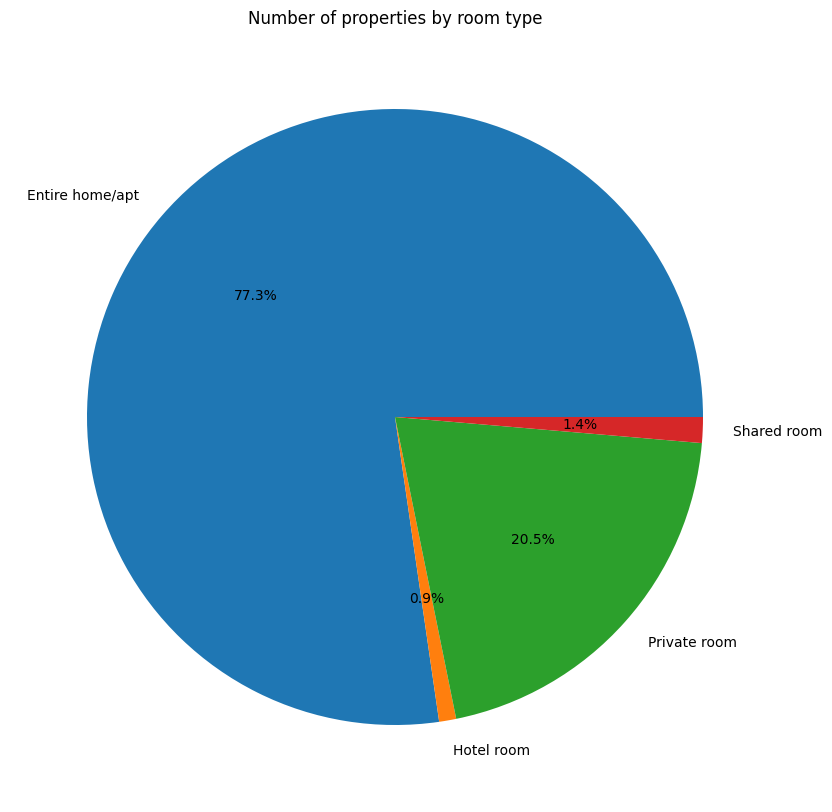

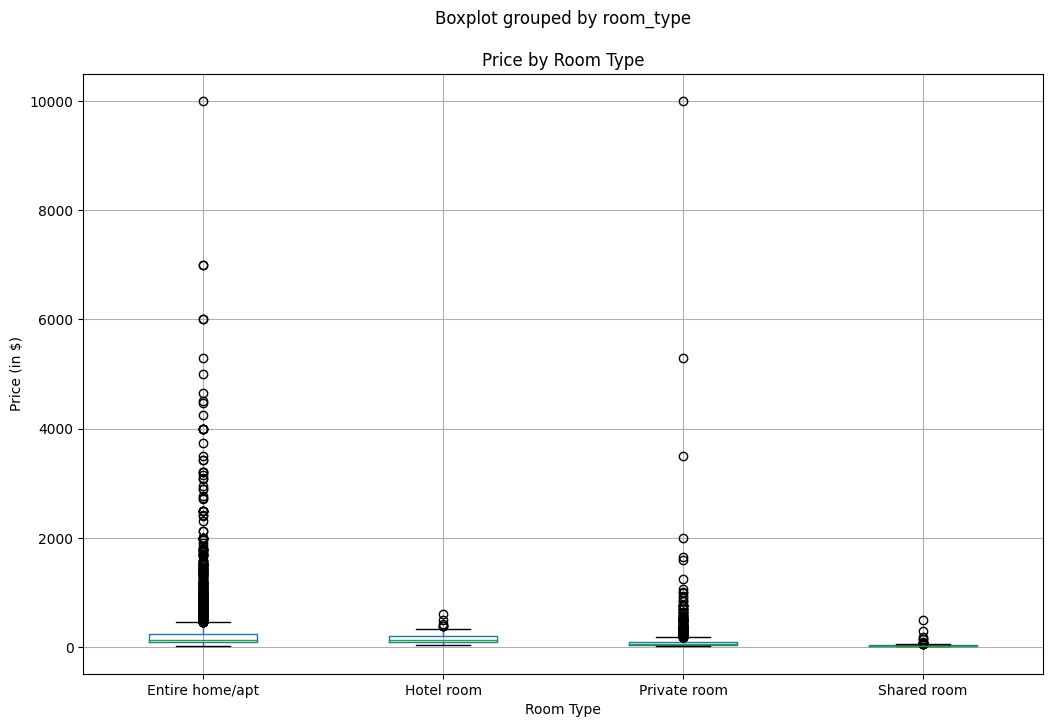

In [177]:
# Set plot width and height
plt.figure(figsize=(10,10))

# create dataframe to number of properties by room_type
room_type_df= airbnb_fl_df.groupby('room_type')['id'].count().reset_index()

# Create pie chart
plt.pie(room_type_df['id'], labels = room_type_df['room_type'], autopct='%1.1f%%')

# Add title
plt.title( "Number of properties by room type")

# Display the plot
plt.show()

# Creating axes instance and creating boxplot from dataframe
ax = airbnb_fl_df.boxplot(column='price', by ='room_type' ,figsize =(12, 8))

# setting labels and title
ax.set_ylabel('Price (in $)')
ax.set_xlabel('Room Type')
ax.set_title('Price by Room Type')

plt.savefig('images/Price_by_Room_Type.png', bbox_inches='tight')

# Display the plot
plt.show()

**Output comments:**

> The above pie chart shows the number of properties shared across different room types. More than 75% of the properties are entire homes/apt, followed by private rooms 20%. Less than 0.9% of the hotel rooms are there. The room type feature would be a good predictor of the price. The next boxplot shows how price is distributed across different room types. Most of the homes/apt are in the range of \\$10 to \\$2000, hotel rooms are in the range of \\$10 to \\$500, private rooms are in the range of \\$10 to \\$1500, and shared rooms are in the range of \\$10 to \\$500. We could see a \\$10000 price for the entire home/apt and private space. A private room \\$10K price may be an outlier. 

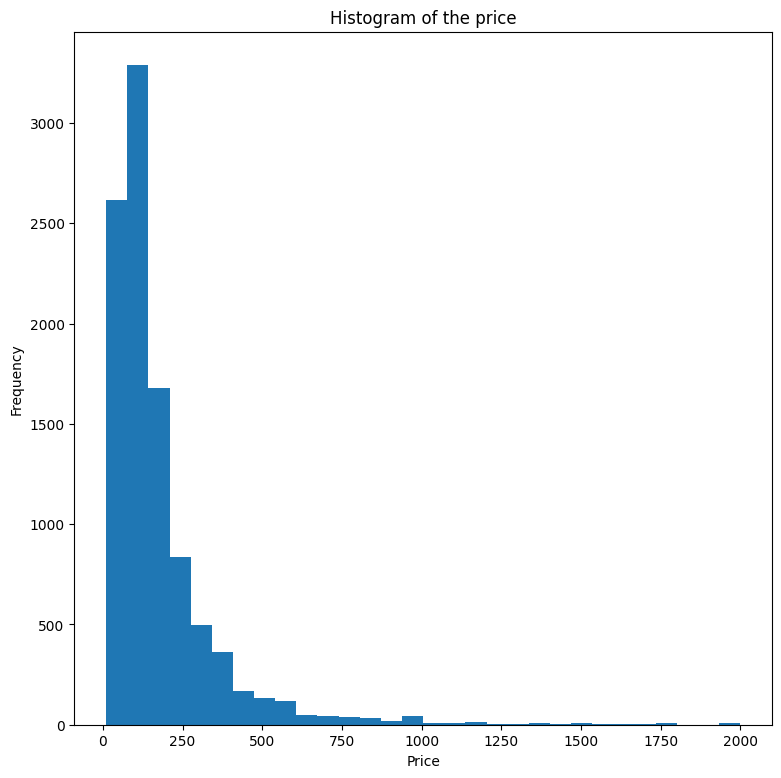

In [178]:
# get histogram of the price
# Set plot width and height
plt.figure(figsize=(9,9))

# create histogram. Range set based on percentile value from the avobe boxplot
plt.hist(airbnb_fl_df['price'], range=[10, 2000], bins=30, align='mid')

# setting labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title( "Histogram of the price")

plt.savefig('images/Histogram_of_the_price.png', bbox_inches='tight')

# Display the plot
plt.show()


**Output comments:**

> The above histogram shows how the price is distributed. It clearly shows that it is not normally distributed and skewed right. It says that the mean is greater than the median. From the above boxplot, we already know that there are a few outliers, and these outliers might be contributing to the skewness.

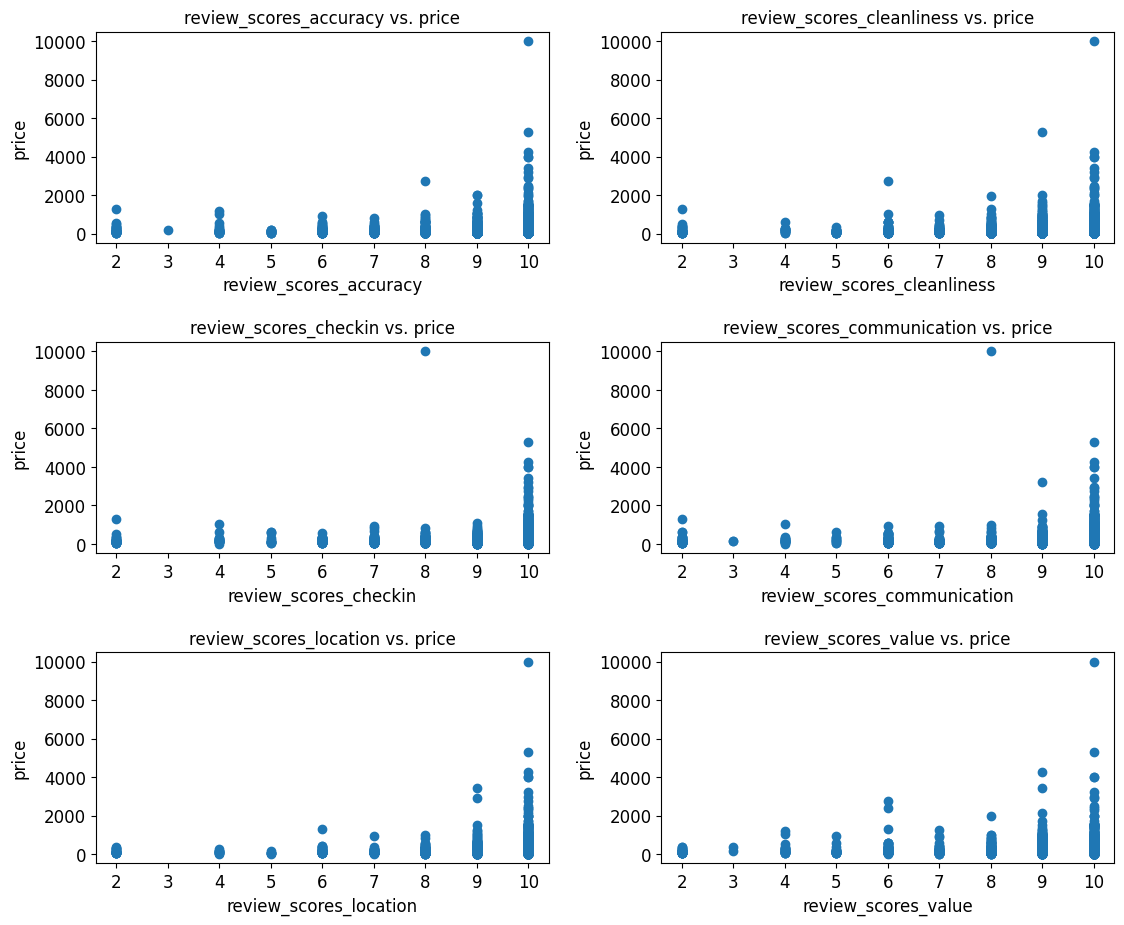

In [179]:
#set the figure size
plt.rcParams['figure.figsize'] = (12, 10)
# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)
# using padding to avoid plot overlapping
fig.tight_layout(pad=5.0)
# Specify the features of interest
num_features = ['review_scores_accuracy', 'review_scores_cleanliness',\
                'review_scores_checkin', 'review_scores_communication',\
               'review_scores_location', 'review_scores_value']
xaxes = num_features
yaxes = ['price', 'price', 'price', 'price','price','price']
# draw scatter plots
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.scatter(airbnb_fl_df[num_features[idx]], airbnb_fl_df[yaxes[idx]])
# setting labels and title    
    ax.set_xlabel(xaxes[idx], fontsize=12)
    ax.set_ylabel(yaxes[idx], fontsize=12)
    ax.set_title(xaxes[idx]+' vs. '+yaxes[idx])
    ax.tick_params(axis='both', labelsize=12)


plt.savefig('images/review_scores_vs_price.png', bbox_inches='tight')

plt.show()

**Output comments:**

> The scatter plot has been used to address how different reviews influence the price. The above scatter plot shows that the price increases with high review scores. It implies that positive correlation between the review score and the price.

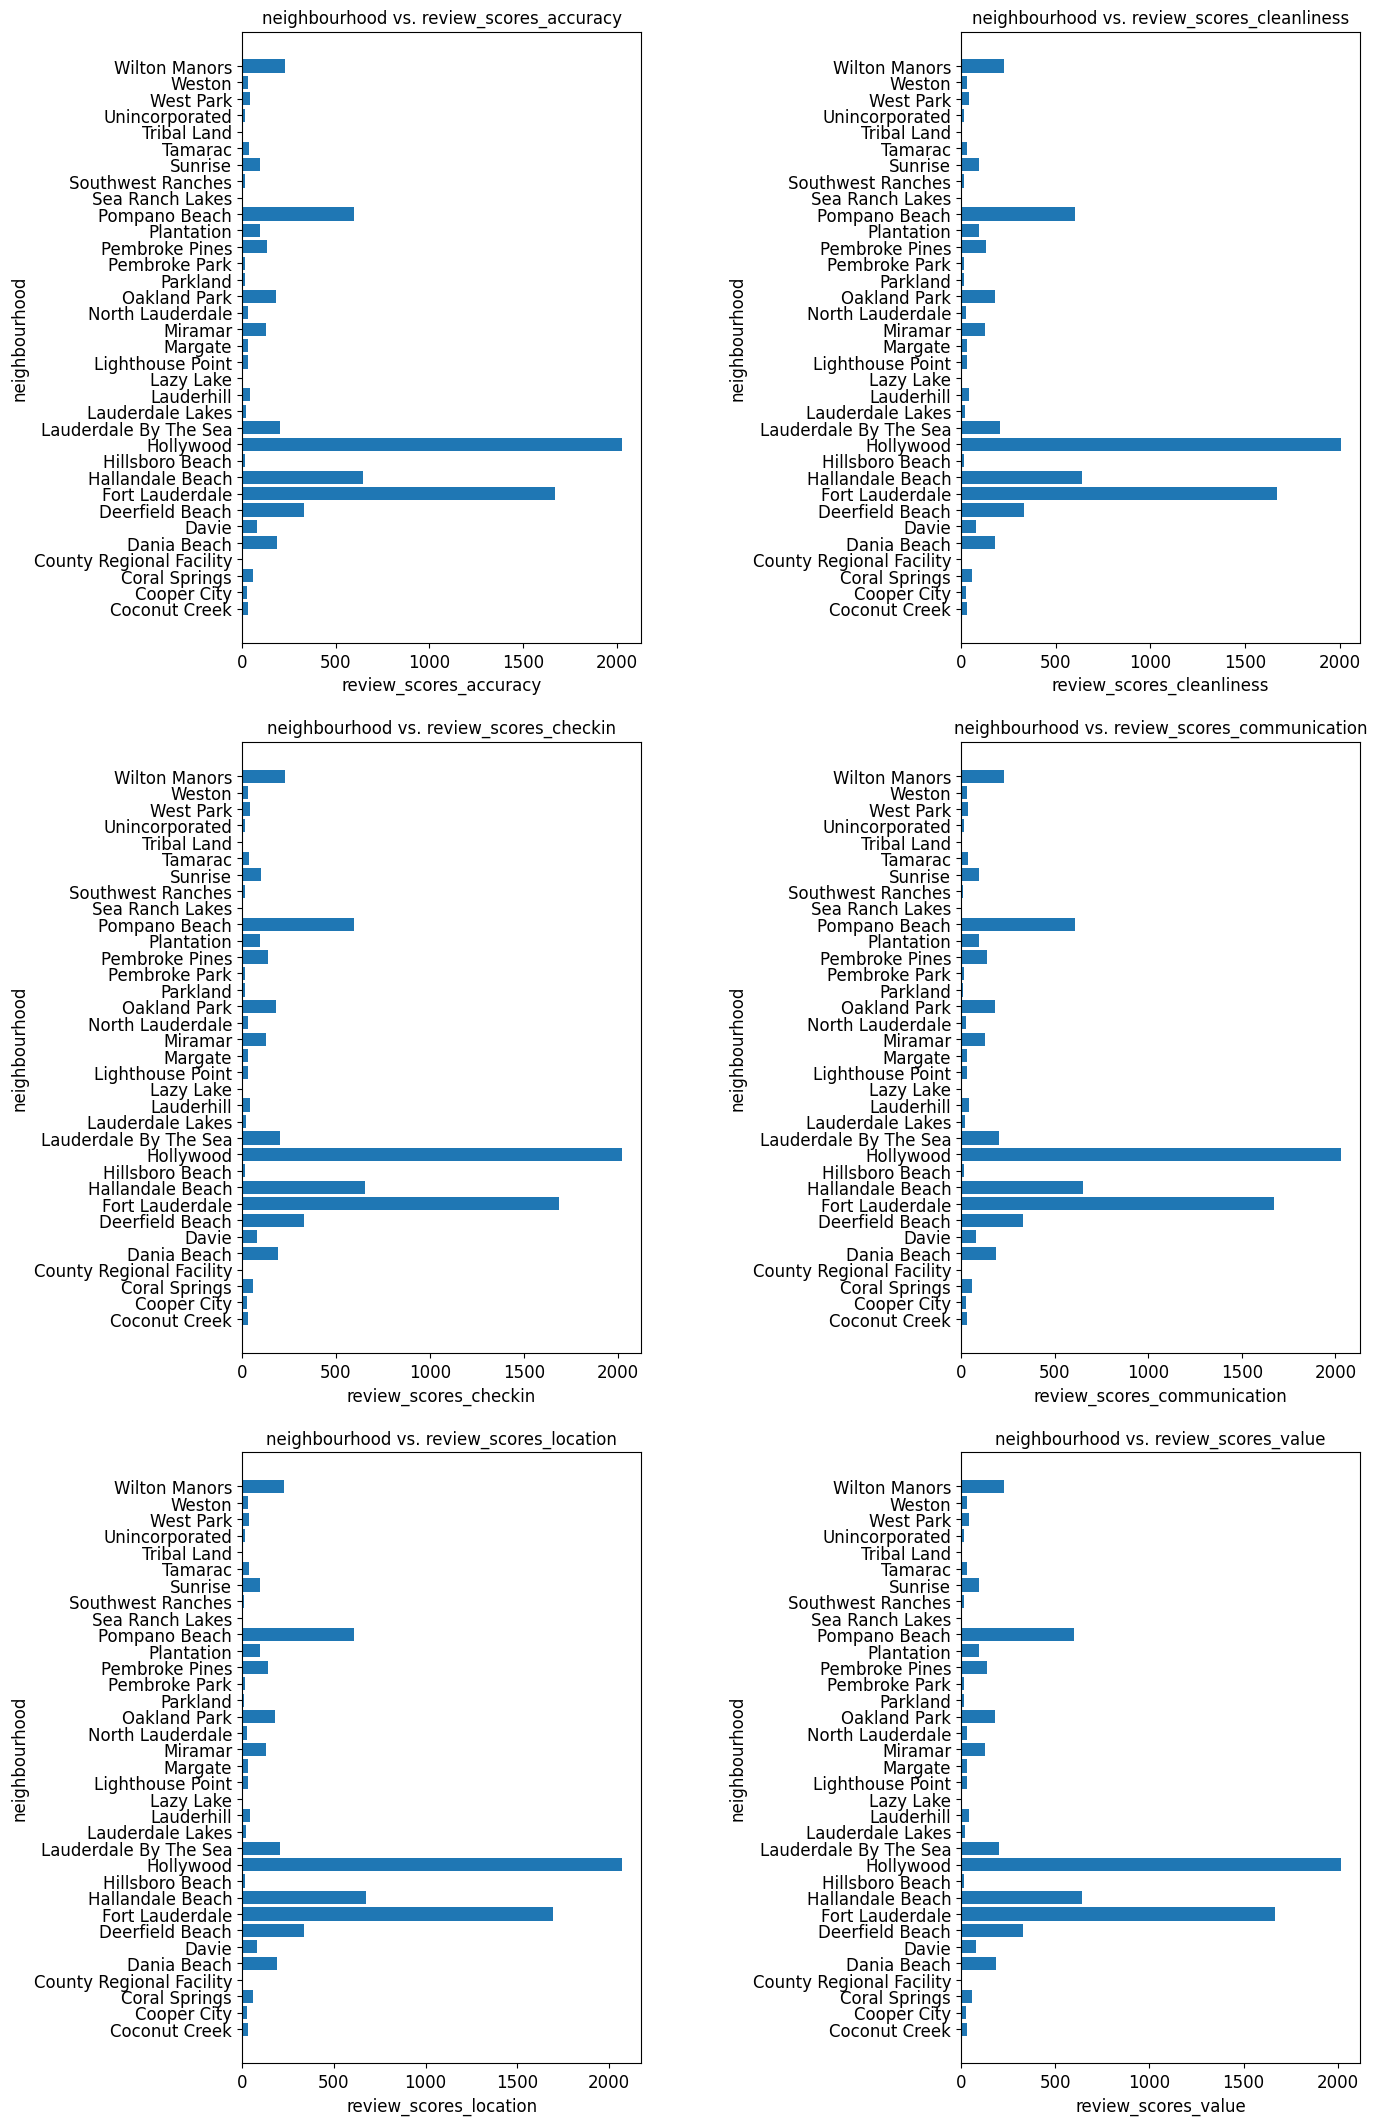

In [180]:
#set the figure size
plt.rcParams['figure.figsize'] = (13, 22)
# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)
# using padding to avoid plot overlapping
fig.tight_layout(pad=5.0)

xaxes = num_features
yaxes = ['neighbourhood', 'neighbourhood', 'neighbourhood', 'neighbourhood','neighbourhood','neighbourhood']
# draw scatter plots
axes = axes.ravel()

for idx, ax in enumerate(axes):
# create dataframe to get total high review score(>7 reviews) by neighbourhood
    neighbourhood_df= airbnb_fl_df[airbnb_fl_df[num_features[idx]]>7].groupby(yaxes[idx])[num_features[idx]].count().reset_index()
    ax.barh(neighbourhood_df[yaxes[idx]], neighbourhood_df[num_features[idx]] )
# setting labels and title    
    ax.set_xlabel(xaxes[idx], fontsize=12)
    ax.set_ylabel(yaxes[idx], fontsize=12)
    ax.set_title(yaxes[idx]+' vs. '+xaxes[idx])
    ax.tick_params(axis='both', labelsize=12)
# adding vertical space between subplots
fig.subplots_adjust(wspace=0.8)
plt.show()

**Output comments:**

> The above horizontal bar chart shows which neighborhood properties have a more high number of reviews. Hollywood and Fort Lauderdale neighborhoods have a higher number of positive reviews. This would be a good predictor of the price.

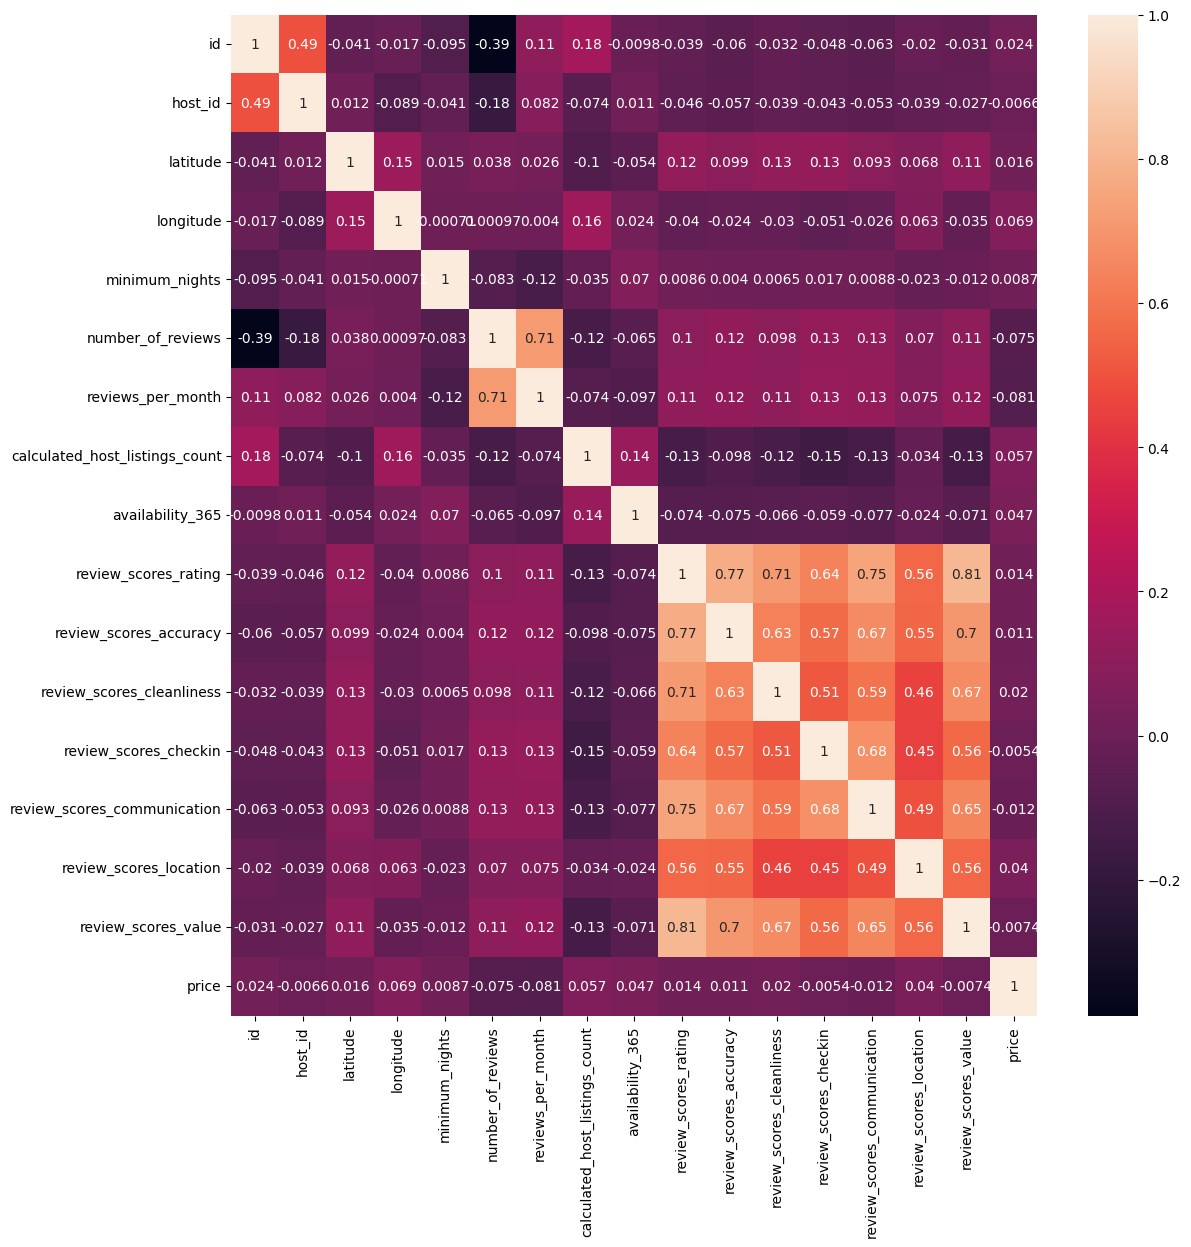

In [181]:
# display correlation using pandas corr method
heat_map_corr = airbnb_fl_df[['id','host_id','latitude','longitude','minimum_nights',\
                            'number_of_reviews','reviews_per_month',\
                            'calculated_host_listings_count','availability_365',\
                            'review_scores_rating','review_scores_accuracy',\
                            'review_scores_cleanliness',\
                'review_scores_checkin', 'review_scores_communication',\
               'review_scores_location', 'review_scores_value','price']].corr()


# Settting figure size
fig, ax = plt.subplots(figsize=(13, 13))

#plotting the heatmap for correlation
ax = sns.heatmap(heat_map_corr, annot=True)      
plt.savefig('images/heatmap.png', bbox_inches='tight')

**Output comments:**

> The above heat map shows the correlation between price and other numerical features. A positive correlation exists between the field price and the fields id, latitude, longitude, minimum_nights, calculated_host_listings_count, availability_365, review_scores_rating,review_scores_accuracy and  review_scores_location. A negative correlation exists between the field price and the field host_id, number_of_reviews, reviews_per_month, review_scores_checkin, review_scores_communication, and review_scores_value.

### Conclusion

> From the above EDA visualization, we can conclude that categorical variables room_types and neighborhood and the numerical variable review scores are good price predictors. The price is right-skewed; it implies that the mean is greater than the median. Both histogram and boxplot suggest that there are few outliers. Interesting to note that the scatter plot shows the positive correlation between the features review_scores_checkin, review_scores_communication, and review_scores_value are negatively correlated with price, but the heat map gave the negative number. Fields id and host_id are not helpful, and all values are null for neighbourhood_group. These features can be removed.

## Milestone 2: Data Preparation

In [182]:
# find missing value percentage of each column
pd.DataFrame((airbnb_fl_df.isnull().sum() / len(airbnb_fl_df))*100)

,0
id,0.000000
name,0.000000
host_id,0.000000
host_name,0.039718
neighbourhood_group,100.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000


In [183]:
# dropping columns neighbourhood_group and last_review
airbnb_fl_df.drop(columns= ['neighbourhood_group'], axis=1, inplace=True)

#display the first 5 rows of data
airbnb_fl_df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,reviews_per_month,calculated_host_listings_count,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,57818,Private house close to the beach!,275948,VonJon,Hollywood,26.01670,-80.12437,Entire home/apt,146,2,...,0.43,1,361,94.0,10.0,9.0,10.0,10.0,10.0,9.0
1,69824,2 bd/2ba Oceanfront Condo,351303,Tracy,Hallandale Beach,25.97840,-80.12028,Entire home/apt,100,30,...,0.20,2,0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
2,83449,MARY POP APTS 2/1 APT SLEEP 5,454736,"Jon, Mary Pop Apartments",Dania Beach,26.03392,-80.14201,Entire home/apt,99,7,...,0.18,8,314,95.0,10.0,10.0,10.0,10.0,10.0,10.0
3,86410,GREAT STUDIO FEW BLOCKS TO THE BEACH,474053,Estela And Adriana,Hallandale Beach,25.98672,-80.12629,Entire home/apt,69,3,...,0.48,1,365,81.0,8.0,8.0,9.0,9.0,8.0,8.0
4,105411,House in the Ranches,532930,Sonia,Southwest Ranches,26.04678,-80.36809,Entire home/apt,235,4,...,0.05,1,355,100.0,10.0,10.0,10.0,10.0,9.0,10.0


**Explanation:** 
> From the above result, neighbourhood_group is missing all the values, and the date field last_review is missing 26%. Other review fields are missing more than 25%. of values. Since all the fields are missing, we can remove the neighbourhood_group. But other numerical fields are essential for model building and can't be removed.

In [184]:
# Feature selection - removing columns name, id, host_id and host_name
airbnb_fl_df.drop(columns= ['name', 'id',  'host_id', 'host_name', 'latitude', 'longitude','last_review'], axis=1, inplace=True)

#display the first 5 rows of data
airbnb_fl_df.head(5)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Hollywood,Entire home/apt,146,2,41,0.43,1,361,94.0,10.0,9.0,10.0,10.0,10.0,9.0
1,Hallandale Beach,Entire home/apt,100,30,7,0.20,2,0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Dania Beach,Entire home/apt,99,7,20,0.18,8,314,95.0,10.0,10.0,10.0,10.0,10.0,10.0
3,Hallandale Beach,Entire home/apt,69,3,55,0.48,1,365,81.0,8.0,8.0,9.0,9.0,8.0,8.0
4,Southwest Ranches,Entire home/apt,235,4,5,0.05,1,355,100.0,10.0,10.0,10.0,10.0,9.0,10.0


**Explanation:** 
> Feature Selection reduces the input variable to your model by using only relevant data and eliminating noise in data. Fields id and host_id are numerical fields, but it looks like system-generated key fields and doesn't provide insight. We can drop the host_name field because it is just the host's name. We already have a neighborhood field, and the field's latitude and longitude are redundant. These fields can be dropped. The last_review field is a date field, and we are not performing any time series analysis. Let's assume it is safe to delete.

In [185]:
# outliers
airbnb_fl_df[airbnb_fl_df['price']>9000]

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
3084,Deerfield Beach,Private room,10000,1,4,0.13,1,365,75.0,10.0,10.0,8.0,8.0,10.0,10.0
7154,Coconut Creek,Entire home/apt,10000,1,0,NaN,1,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
# removing outliers
airbnb_fl_df = airbnb_fl_df[airbnb_fl_df['price']<9000]

# after removing outliers
airbnb_fl_df[airbnb_fl_df['price']>9000]

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value


**Explanation:** 
> Outliers increase the error variance and reduce statistical tests' power, and it must be handled carefully.. From the boxplot, we knew that there two properties are listed for \\$10K. This could be a valid listing, but all other listing price is less than \\$7K. Let's assume these two values are an outlier and can be removed to ensure good sampling.

In [187]:
# Adding new feature
airbnb_fl_df["log_price"] = np.log(airbnb_fl_df.loc[:,"price"])

# removing price column

airbnb_fl_df.drop(columns= ['price'], axis=1, inplace=True)

# display first five records
airbnb_fl_df.head(5)

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,log_price
0,Hollywood,Entire home/apt,2,41,0.43,1,361,94.0,10.0,9.0,10.0,10.0,10.0,9.0,4.983607
1,Hallandale Beach,Entire home/apt,30,7,0.20,2,0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,4.605170
2,Dania Beach,Entire home/apt,7,20,0.18,8,314,95.0,10.0,10.0,10.0,10.0,10.0,10.0,4.595120
3,Hallandale Beach,Entire home/apt,3,55,0.48,1,365,81.0,8.0,8.0,9.0,9.0,8.0,8.0,4.234107
4,Southwest Ranches,Entire home/apt,4,5,0.05,1,355,100.0,10.0,10.0,10.0,10.0,9.0,10.0,5.459586


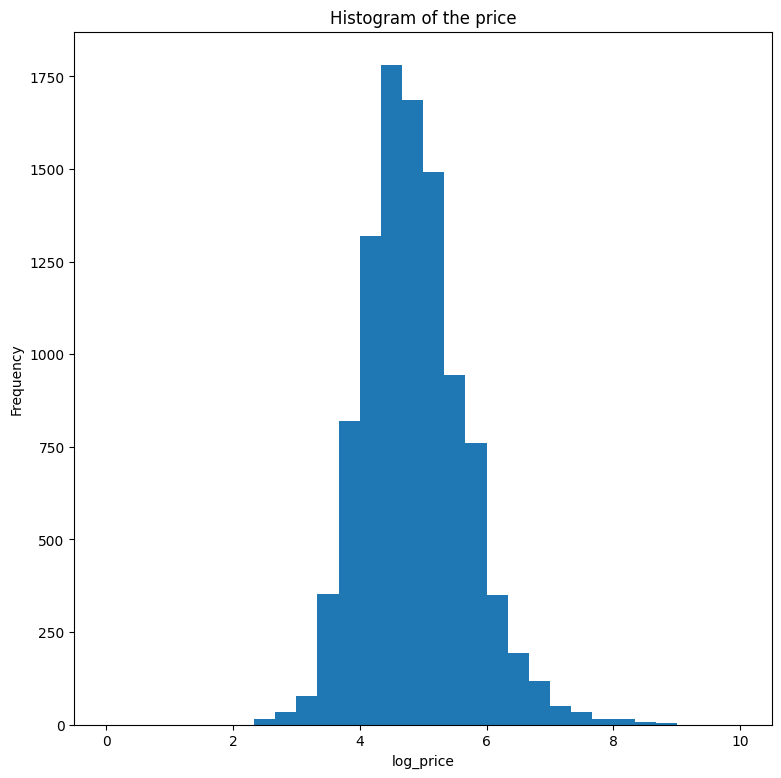

In [188]:
# get histogram of the price
# Set plot width and height
plt.figure(figsize=(9,9))

# create histogram. Range set based on percentile value from the avobe boxplot
plt.hist(airbnb_fl_df['log_price'], range=[0, 10], bins=30, align='mid')

# setting labels and title
plt.xlabel('log_price')
plt.ylabel('Frequency')
plt.title( "Histogram of the price")

# Display the plot
plt.show()

**Explanation:** 
> From the histogram from the EDA price is skewed right. Using log transformation will help to make the distribution more symmetric. The above histogram looks more symmetric.

In [189]:
# find the columns with missing values
missing_values_column_list = airbnb_fl_df.columns[airbnb_fl_df.isnull().any()].tolist()
missing_values_column_list

['reviews_per_month',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [190]:
# All the missing value column are numeric.
# filling the missing values for numerical columns with mean
for column_name in missing_values_column_list:    
    airbnb_fl_df[column_name].fillna(airbnb_fl_df[column_name].mean(), inplace=True)
    

In [191]:
# validate all the missing values are handled
airbnb_fl_df.columns[airbnb_fl_df.isnull().any()]

Index([], dtype='object')

In [192]:
airbnb_fl_df.head(5)

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,log_price
0,Hollywood,Entire home/apt,2,41,0.43,1,361,94.0,10.000000,9.000000,10.000000,10.000000,10.000000,9.0000,4.983607
1,Hallandale Beach,Entire home/apt,30,7,0.20,2,0,100.0,9.567284,9.430537,9.671979,9.656544,9.706211,9.3845,4.605170
2,Dania Beach,Entire home/apt,7,20,0.18,8,314,95.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,4.595120
3,Hallandale Beach,Entire home/apt,3,55,0.48,1,365,81.0,8.000000,8.000000,9.000000,9.000000,8.000000,8.0000,4.234107
4,Southwest Ranches,Entire home/apt,4,5,0.05,1,355,100.0,10.000000,10.000000,10.000000,10.000000,9.000000,10.0000,5.459586


**Explanation:** 
> Fields reviews_per_month,  review_scores_rating, review_scores_accuracy, 'review_scores_cleanliness,
 review_scores_checkin,  review_scores_communication,
 review_scores_location and  review_scores_value have missing values. All these fields are numerical columns. We can impute missing values using mean.

In [193]:
# Creating dummy variables
print(f" Number of unique neighbourhood are {airbnb_fl_df['neighbourhood'].nunique()}")
print(f" Number of unique room_type are {airbnb_fl_df['room_type'].nunique()}")      

 Number of unique neighbourhood are 34
 Number of unique room_type are 4


In [194]:
# Converting categorical columns to dummy variabels using pandas get_dummies method
airbnb_fl_df = pd.get_dummies(airbnb_fl_df,columns = ['neighbourhood', 'room_type'], dtype=int )

In [195]:
airbnb_fl_df.columns

Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'log_price', 'neighbourhood_Coconut Creek',
       'neighbourhood_Cooper City', 'neighbourhood_Coral Springs',
       'neighbourhood_County Regional Facility', 'neighbourhood_Dania Beach',
       'neighbourhood_Davie', 'neighbourhood_Deerfield Beach',
       'neighbourhood_Fort Lauderdale', 'neighbourhood_Hallandale Beach',
       'neighbourhood_Hillsboro Beach', 'neighbourhood_Hollywood',
       'neighbourhood_Lauderdale By The Sea', 'neighbourhood_Lauderdale Lakes',
       'neighbourhood_Lauderhill', 'neighbourhood_Lazy Lake',
       'neighbourhood_Lighthouse Point', 'neighbourhood_Margate',
       'neighbourhood_Miramar', 'neighbourhood_North Lauder

**Explanation:** 
> Dummy variables are useful because they allow us to include categorical variables in our analysis. Fields neighborhood and room_type are the two categorical variables. Apply one-hot encoding and transform categorical variables into numerical variables to pass them to machine learning algorithms.

In [196]:
'''
Using train_test_split from sklearn, split
the dataset into train and test sets. 
price is the target that needs to be predicted, and
the remaining columns are independent variables.
The parameter test_size = 0.3 allocates 30% of data for training,
and random_state=0  gives the same train and
test sets across different execution
'''
def train_test_split_method(exclude_column_list, target_column, test_size_val ):
    # get independent variables
    X = airbnb_fl_df.loc[:,~airbnb_fl_df.columns.isin(exclude_column_list)]
    # get dependent variable
    y = airbnb_fl_df.loc[:,airbnb_fl_df.columns == target_column]
    # split the dataset
    return  train_test_split(X ,y,test_size = test_size_val , random_state = 0 )


**Explanation:** 
> Splitting the data into train and test datasets. The model will learn using the training dataset and predict the result for the test dataset. The price is the dependent variable, and all other fields are independent. Standardize the independent variables using. StandardScaler.

## Milestone 3: Model Building and Evaluation

> The Airbnb price prediction problem fits the regression model because the target variable is the continuous variable price. We will use the R2 coefficient of determination, root mean square error, and absolute error as evaluation metrics.

In [197]:
# average log price
print('Average log price = {:.2f}'.format(airbnb_fl_df['log_price'].mean()))

Average log price = 4.86


In [198]:
# creating method for evaluation metrics
def model_evaluating_regression(test_features, target_test,target_predict_test, model):    
# Calculate R2 for test sets
    r2_value_test = model.score(test_features, target_test)
    print('R2 value of test set: = {:.2f}'.format(r2_value_test))

# calculate root mean square error for test dataset
    rmse_value_test = mean_squared_error(target_test, target_predict_test, squared = False)
    print('RMSE value of test set: = {:.2f}'.format(rmse_value_test))

# calculate mean absolute error for test dataset
    mae_value_test = mean_absolute_error(target_test, target_predict_test)
    print('MAE value of test set: = {:.2f}'.format(mae_value_test))
    return {'R2':r2_value_test, 'RMSE': rmse_value_test, 'MAE':mae_value_test}
    
        

In [199]:
# split data into train and test dataset
exclude_column_list = ['log_price']
feature_train, feature_test, target_train, target_test = train_test_split_method(exclude_column_list, 'log_price', 0.3)

In [200]:
# get Ordinary Linear Regression
regression_model = LinearRegression()

# fit the linear model using training dataset
regression_model.fit(feature_train, target_train)

# predict price values
target_predict_ols_test = regression_model.predict(feature_test)

In [201]:
model_dict={}
# Model evaluation
model_dict['LinearRegression'] = model_evaluating_regression(feature_test, target_test,target_predict_ols_test, regression_model)

R2 value of test set: = 0.25
RMSE value of test set: = 0.70
MAE value of test set: = 0.54


**Explanation:** 
> Linear Regression is the supervised Machine Learning model where the model finds the best fit linear line between the independent and dependent variable. It is one of the simplest models to use as the base model. We will start with the simple OLS. The coefficient of determination for the test dataset is 0.25. This means that features can explain just 25% of the price variation. 25% is low.
The RMSE represents the square root of the variance of the residuals, which means it tells us the difference between the prediction and the actual value. In the test dataset, it is 0.7, which is less than the average log price.
The MAE helps to identify the average error between the predictions and actuals in the dataset. The MAE is 0.54 for the test dataset. The average log price is 4.84 in the training dataset.


In [202]:
# Pvalue is useful when deciding lasso vs ridge regression
# find pvalue
def p_value_calculate(target_column):
    p_val = pearsonr(airbnb_fl_df['log_price'], airbnb_fl_df[target_column])
    if(p_val[1] < 0.05):
        print(target_column,p_val[1])

for col_name in airbnb_fl_df.columns:
    if(col_name != 'log_price'):
        p_value_calculate(col_name)

number_of_reviews 1.5507861772057974e-55
reviews_per_month 1.784643881630775e-33
calculated_host_listings_count 2.138659063625376e-90
availability_365 4.474064352072983e-22
review_scores_rating 0.01643921515375537
review_scores_checkin 0.006633645571094234
review_scores_communication 0.03904185530665097
review_scores_location 5.65291208706753e-08
review_scores_value 0.019904123626884828
neighbourhood_Coconut Creek 7.146987690443031e-07
neighbourhood_Cooper City 0.0429308798420858
neighbourhood_Coral Springs 1.353512441095134e-06
neighbourhood_Dania Beach 0.0033322363503521923
neighbourhood_Davie 4.361079566276477e-06
neighbourhood_Deerfield Beach 0.000620875852624076
neighbourhood_Fort Lauderdale 1.9911194251479761e-41
neighbourhood_Hallandale Beach 0.0006579163262616685
neighbourhood_Lauderdale Lakes 1.3710956660920907e-06
neighbourhood_Lauderhill 1.3329586334801514e-05
neighbourhood_Lighthouse Point 3.6101664209883786e-09
neighbourhood_Margate 1.8852955518999173e-06
neighbourhood_Mir

In [203]:
# The ols model produce r2 value of 0.25 which is low.
# We can use ridge regression and find the best parameters for the model
# build pipeline for ridge regression
pipeline_gs = Pipeline([('scaler',StandardScaler()),('model',Ridge())])

In [204]:
#For each value, we calculate the average value of the mean squared error in a 10-folds CV
#select the value of α that minimizes such average performance metrics

ridge_model = GridSearchCV(pipeline_gs,
                      {'model__alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5 ,20]},
                        cv = 10, 
                        scoring ="neg_mean_squared_error"
                      )

#fit the grid search
ridge_model.fit(feature_train, target_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 20]},
             scoring='neg_mean_squared_error')

In [205]:
#The best value for hypertuning parameter (alpha)
ridge_model.best_params_

{'model__alpha': 20}

In [206]:
# fit the rdige model with alpha 20
ridge_model = Ridge(alpha=20)
ridge_model.fit(feature_train, target_train)

Ridge(alpha=20)

In [207]:
#predict on training data
target_predict_lasso_test = ridge_model.predict(feature_test)

In [208]:
# Model evaluation
model_dict['RidgeRegression'] = model_evaluating_regression(feature_test,target_test,target_predict_lasso_test, ridge_model)

R2 value of test set: = 0.25
RMSE value of test set: = 0.70
MAE value of test set: = 0.54


**Explanation:** 
> Since many predictor variables are significant we can use ridge regression. From the above ridge regression, the R2,RMSE and MAE value looks the same. It didn't improve the model

In [209]:
# split the data fir KNeighborsRegressor model
exclude_column_list = ['log_price']
feature_train, feature_test, target_train, target_test = train_test_split_method(exclude_column_list, 'log_price', 0.3)
target_train = target_train.values.ravel()
target_test = target_test.values.ravel()

In [210]:
# create instance for StandardScaler scalar
sc = StandardScaler()

# fit and transform the tranining feature
training_features_stand=sc.fit_transform(feature_train)

# transform the test features
test_features_stand = sc.transform(feature_test)

In [211]:
# creating instance for KNN regressor
knn = KNeighborsRegressor()

# Fitting k-nearest neighbors model
knn.fit(training_features_stand,target_train)

# Making Knn prediction
knn_predictions = knn.predict(test_features_stand)


In [212]:
# Model evaluation
model_dict['KNeighborsRegressor'] = model_evaluating_regression(test_features_stand, target_test,knn_predictions, knn)

R2 value of test set: = 0.24
RMSE value of test set: = 0.71
MAE value of test set: = 0.52


**Explanation:** 
> KNN algorithm can be used to solve both classification and regression problems. It uses feature similarity to predict the data point. Since we are trying to solve the regression problem, KNN regression fits this problem. We can pass features to predict the price. The above result shows that R2 value is 0.24 which 1% less than the Ols , RMSE is 0.71 and MAE 0.52.

In [213]:
# create dict to store the fitted model
fitted_model_dict = {}

# create empty dataframe
model_performance_df = pd.DataFrame(columns =\
                                    [ 'R2', 'RMSE','MAE'])
# iterating through each model in the dictionary
for model_name, eval_metrics in model_dict.items(): 
    model_performance_df.loc[model_name] =[eval_metrics['R2'], eval_metrics['RMSE'],eval_metrics['MAE']]

# print models performance metrics
    
display(model_performance_df)

,R2,RMSE,MAE
LinearRegression,0.250100,0.700205,0.537030
RidgeRegression,0.246164,0.702040,0.539023
KNeighborsRegressor,0.236138,0.706694,0.521151


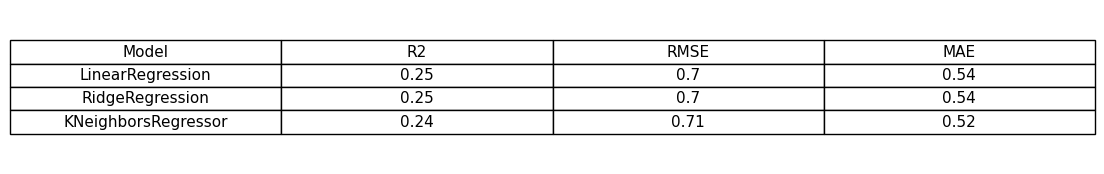

In [214]:
model_performance_with_label_df = model_performance_df.reset_index()
model_performance_with_label_df.columns = ['Model','R2','RMSE','MAE']

for column in ['R2','RMSE','MAE']:
    model_performance_with_label_df[column] = model_performance_with_label_df[column].apply(lambda x: f"{x:.2}")

fig, ax = plt.subplots(figsize=(10,2))
ax.axis('tight')
ax.axis('off')
table=ax.table(cellText=model_performance_with_label_df.values,colLabels=model_performance_with_label_df.columns,cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.4,1.4)
plt.savefig('images/comparison_of_the_performance_metrics.png', bbox_inches='tight')
plt.show()

# Conclusion

> From the above models, OLS has a coefficient of determination for the test dataset is 0.25 with a root mean square error of 0.7 and MAE of 0.54, which is much less than the average log price. We tried to tune the hyperparameter with the ridge regression, but the evaluation metrics look the same. Next, we tried to use the KNN regression model, which yield almost similar to the OLS model result. From the above three models, OLS seems to perform better.